In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import re

In [2]:
data = pd.read_csv("./dataset/final_training.csv")  ## path
data.head()

,Unnamed: 0,Review,Label
0,0,aret as a woman you should not complain a abou...,0
1,1,aret boy dats cold tyga dwn bad for cuffin dat...,1
2,2,aret dawg aret you ever fuck a bitch and she s...,1
3,3,aret she look like a tranny,1
4,4,aret the shit you hear a about ame amight be t...,1


In [3]:
data.drop(["Unnamed: 0"],axis=1,inplace=True)

In [4]:
data.describe()

,Label
count,184354.000000
mean,0.199860
std,0.399896
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


#### 1 for toxic 0 for normal


In [5]:
toxic = data[data["Label"]==1]
normal = data[data["Label"]==0]

In [6]:
len(toxic),len(normal)

(36845, 147509)

In [7]:
print("Percentage of normal comments = {}".format(len(normal)/len(data)*100))
print("Percentage of toxic comments = {}".format(len(toxic)/len(data)*100))

Percentage of normal comments = 80.01399481432462
Percentage of toxic comments = 19.986005185675385


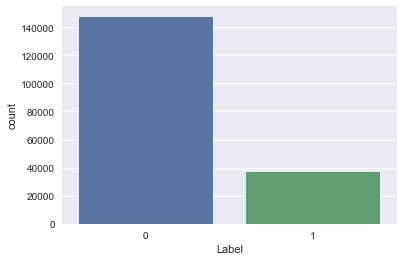

In [8]:
sns.set()
sns.countplot(data["Label"])
plt.show()

In [9]:
data['char_length'] = data['Review'].apply(lambda x: len(str(x)))

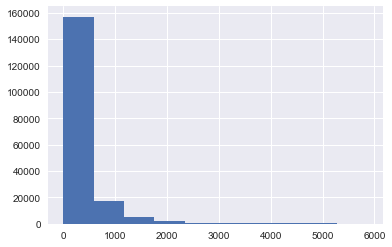

In [10]:
sns.set()
data['char_length'].hist()
plt.show()

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data['Review'], data['Label'], test_size=0.2, random_state=42)

In [12]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(147483,) (36871,)
(147483,) (36871,)


In [13]:
import pickle

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(max_features = 10000, stop_words='english')
#vect = TfidfVectorizer(stop_words='english')
print(vect)
pickle.dump(vect, open("./saved_models/vectorizer.pkl", "wb"))

TfidfVectorizer(max_features=10000, stop_words='english')


In [14]:
%%time 

X_train_dtm = vect.fit_transform(X_train.apply(lambda x: np.str_(x)))

X_train_dtm

Wall time: 6.94 s


In [15]:
pickle.dump(vect, open("./saved_models/vectorizer.pkl", "wb"))

In [16]:
vect = pickle.load(open("./saved_models/vectorizer.pkl", 'rb'))

In [17]:
X_train_dtm.shape

(147483, 10000)

In [18]:
%%time
X_test_dtm = vect.transform(X_test.apply(lambda x: np.str_(x)))

X_test_dtm

Wall time: 1.68 s


In [19]:
X_test_dtm.shape

(36871, 10000)

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
logreg = LogisticRegression(C=1, max_iter = 2000)
import pickle

 

# train the model using X_train_dtm & y_train
logreg.fit(X_train_dtm, y_train)
filename = "./saved_models/lr_model.pkl"
pickle.dump(logreg, open(filename, 'wb'))
# compute the training accuracy
y_pred_train = logreg.predict(X_train_dtm)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
# compute the predicted probabilities for X_test_dtm
y_pred_test = logreg.predict(X_test_dtm)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))

Training accuracy is 0.9597241715994386
Test accuracy is 0.9542730058853842
[[29304   256]
 [ 1430  5881]]


### Testing trained model

In [21]:
import pickle
model = pickle.load(open("./saved_models/lr_model.pkl", 'rb'))
vect = pickle.load(open("./saved_models/vectorizer.pkl", 'rb'))

In [22]:
sen = ["Hey girl...wanna suck"]
sen_trans = vect.transform(sen)
p = model.predict(sen_trans)[0]
validity = ["allowed","toxic"]
print(validity[p])

toxic


In [23]:
sen = ["Hey girl...you are beautiful"]
sen_trans = vect.transform(sen)
p = model.predict(sen_trans)[0]
validity = ["allowed","toxic"]
print(validity[p])

allowed


In [24]:
sen = ["Hey girl...you are nice but I think you like anal"]
sen_trans = vect.transform(sen)
p = model.predict(sen_trans)[0]
validity = ["allowed","toxic"]
print(validity[p])

toxic
